$$\require{mhchem}$$       

# Improving selectivity with a membrane reactor

We're interested in improving the selectivity of a PFR with two competing reactions:
\begin{align*}
\ce{A + B ->[r_1] D}\\
\ce{A + B ->[r_2] U}
\end{align*}
where $\ce{D}$ is a desirable product, and  $\ce{U}$ is the undesirable product.  We define the selectivity in the reactor as:
\begin{align*}
S_{D/(D+U)}=\frac{F_D}{F_D+F_U}
\end{align*}
The first reaction proceeds with rate $r_1=k_1 C_A^2C_B$ with $k_1=2$dm$^6$/mol$^2\cdot$ s, while the second reaction follows a different rate law $r_2=k_2 C_AC_B^2$ with $k_2=3$dm$^6$/mol$^2\cdot$ s. In either case, the reactor volume is 50L with an inner diameter of 20 cm. You can assume the reactor is isobaric and isothermal. 

#### Part A:  Solve for and plot the flow rates of A, B, D, and U (mol/s) against the distance traveled along the PFR (m). Assume that:
1. the PFR is standard (i.e., not membrane)
2. A and B are flowing into the inner vessel each at a flow rate of $4\; mol/s$
3. the combined, total concentration of A and B at the inlet is $0.8\; mol/dm^3$
4. All reactor flows are in solution, which means that changes in species concentrations do not affect volumetric flowrates significantly.
#### What's the final molar flowrate of D exiting the reactor? (4 pts)

The outlet flowrate of D is 1.07 mol/s


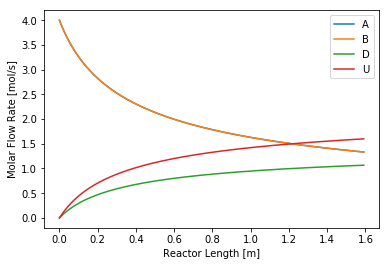

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

k1 = 2.               # dm^6/mol^2/s
k2 = 3.               # dm^6/mol^2/s
F0 = [4., 4., 0., 0.] # mol/s
v0 = sum(F0)/0.8      # dm^3/s
V = 50.               # L
radius = 2./2         # dm
A = np.pi*radius**2   # dm^2

def dFdV_pfr(F, V):
    '''
    Return a vector of the change in molar flowrates (mol/s) as a function
    of the volume of the reactor that the species have passed through (V).
    Final differential units are mol/s/dm^3
    '''
    # Unpack the input (mol/s)
    Fa, Fb, Fd, Fu = F
    # Use the flowrate input to calculate concentration (mol/dm^3)
    Ca = Fa/v0
    Cb = Fb/v0
    # Use the concentrations to calculate reaction rates (mol/dm^3/s)
    r1 = k1*Ca**2*Cb
    r2 = k2*Ca*Cb**2
    # Use reaction rates to calculate differentials (mol/s/dm^3)
    dFadV = -r1-r2
    dFbdV = -r1-r2
    dFddV = r1
    dFudV = r2
    return [dFadV, dFbdV, dFddV, dFudV]

Vspan = np.linspace(0, V, 1000)   # L
dspan = (Vspan/A)/10              # m
sol_pfr = odeint(dFdV_pfr, F0, Vspan)  # mol/s
Fd_outlet_pfr = sol_pfr[-1, 2]

print('The outlet flowrate of D is %.2f mol/s' % Fd_outlet_pfr)
plt.plot(dspan, sol_pfr)
plt.xlabel('Reactor Length [m]')
plt.ylabel('Molar Flow Rate [mol/s]')
plt.legend(['A', 'B', 'D', 'U'])
plt.show()

#### Part B:  Calculate and plot the selectivity $S_{D/U}$ vs. reactor length (m). The scale of $S_{D/U}$ on the y-axis should be [0, 1] (2 pts)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


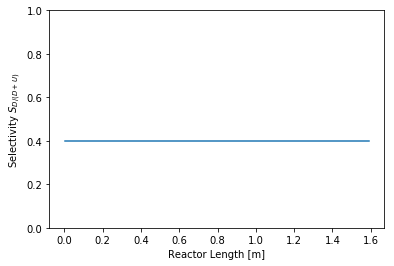

In [2]:
Fd = sol_pfr[:, 2]   # mol/s
Fu = sol_pfr[:, 3]   # mol/s
S_pfr = Fd/(Fd+Fu)    # mol/mol

plt.plot(dspan, S_pfr)
plt.xlabel('Reactor Length [m]')
plt.ylabel('Selectivity $S_{D/(D+U)}$ ')
plt.ylim([0, 1])
plt.show()

#### Part C:  Solve for and plot the flow rate profiles of A, B, D, and U (mol/s) against the distance traveled along the PFR (m). This time, assume that:
1. The PFR is a membrane PFR, where A is fed into the inner vessel, B is fed into the outer vessel, and only species B may transport across the membrane.
2. A is flowing in to the inner vessel at a molar flow rate of $4\; mol/s$ and a concentration of $0.4\; mol/dm^3$.
3. B is flowing in to the outer vessel at a molar flow rate of $4\; mol/s$ and a concentration of $0.4\; mol/dm^3$.
4. mass transport across the membrane (from the outer to the inner vessel) can be modeled with $R_B=ak_{cB}(C_{Bin}-C_{Bout})$ with $k_{cB}=0.1\;$dm/s$.
#### (6 pts)

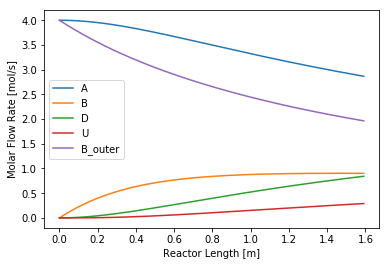

In [3]:
v0 = 4/0.4            # dm^3/s
v0_outer = 4/0.4      # dm^3/s
# The new, 5th element in F0 is the flowrate of species B in the outer vessel
F0 = [4., 0, 0, 0, 4.] # mol/s
V = 50.                # dm^3
kcB = 0.1              # dm/s
a = 2./radius          # dm

def dFdV_mem(F, V):
    # Unpack the input (mol/s)
    Fa, Fb, Fd, Fu, Fb_outer = F
    # Use the flowrate input to calculate concentration (mol/dm^3)
    Ca = Fa/v0
    Cb = Fb/v0
    Cb_outer = Fb_outer/v0_outer
    # Use the concentrations to calculate reaction rates (mol/dm^3/s)
    r1 = k1*Ca**2*Cb
    r2 = k2*Ca*Cb**2
    Rb = a*kcB*(Cb_outer-Cb)
    # Use reaction rates to calculate differentials (mol/s/dm^3)
    dFadV = -r1-r2
    dFbdV = -r1-r2+Rb
    dFddV = r1
    dFudV = r2
    dFb_outerdV = -Rb
    return [dFadV, dFbdV, dFddV, dFudV, dFb_outerdV]

sol_mem = odeint(dFdV_mem, F0, Vspan)

plt.plot(dspan, sol_mem)
plt.xlabel('Reactor Length [m]')
plt.ylabel('Molar Flow Rate [mol/s]')
plt.legend(['A', 'B', 'D', 'U', 'B_outer'])
plt.show()

#### Part D:  To make a fair comparison comparison between the standard PFR and the membrane PFR, we want to analyze a membrane PFR system that has an outlet molar flowrate of D equal to the one you calculated in Part A (for the standard PFR). For the membrane PFR, what is a molar feedrate of B in the outer vessel (mol/s) that will yield this outlet flowrate of D? (4 pts)

In [4]:
from scipy.optimize import fsolve

def fun(Fb_inlet):
    '''
    This function calculates the flowrate of species D exiting the inner vessel for
    a membrane PFR, and then subtracts it from the flowrate of species D
    exiting a standard PFR. If this function returns zero, then the two
    flowrates have converged.
    '''
    F0 = [4, 0, 0, 0, Fb_inlet]
    sol_mem = odeint(dFdV_mem, F0, Vspan)
    Fd_outlet_mem = sol_mem[-1, 2]
    return Fd_outlet_pfr - Fd_outlet_mem

Fb_inlet1 = fsolve(fun, 15)
print('An inlet flowrate of B that would achieve this is %.2f mol/s' % Fb_inlet1)
Fb_inlet2 = fsolve(fun, 4)
print('%.2f mol/s also works' % Fb_inlet2)

An inlet flowrate of B that would achieve this is 22.46 mol/s
6.06 mol/s also works


Below is a plot of the outlet flowrat D vs. the inlet flowrate of B. It shows why there are two solutions.

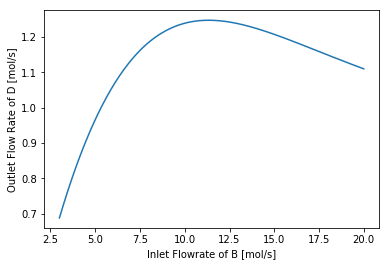

The highest outlet flowrate of D that can be achieved is 1.25 mol/s


In [5]:
# The vector of Fb_inlet values that we want to plot over
Fb_inlet_span = np.linspace(3., 20., 500)

# Initialize a list of solutions
Fd_outlet_mem = []
# Integrate all the way out for each of the inlet flowrates of B to calculate the outlet
# flowrates of D
for Fb_inlet in Fb_inlet_span:
    F0 = [4., 0., 0., 0., Fb_inlet]
    sol = odeint(dFdV_mem, F0, Vspan)
    Fd_outlet_mem.append(sol[-1, 2])

# Plot
plt.plot(Fb_inlet_span, Fd_outlet_mem)
plt.xlabel('Inlet Flowrate of B [mol/s]')
plt.ylabel('Outlet Flow Rate of D [mol/s]')
plt.show()
print('The highest outlet flowrate of D that can be achieved is %.2f mol/s' % max(Fd_outlet_mem))

#### Part E:  Now we want to compare the selectivities of the two reactor types. Start by recalculating the flow profiles in the membrane PFR—i.e., Part C—but use the newly identified inlet flowrate of B. Then use this profile to calculate the selectivity (mol/mol) as a function of reactor length (m). Now plot this new selectivity profile alongside the selectivity profile you created in Part B. Which reactor configuration would you recommend, standard PFR or membrane? Why? (2 pts)

Note that this can change depending on the local solution that the student finds, since FB_inlet can take two values

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


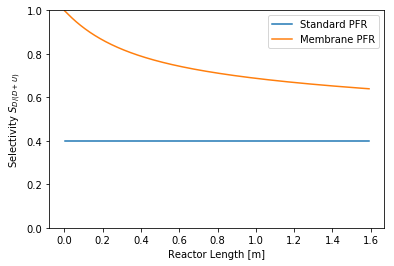

In [6]:
# Re-solve the membrane problem with the new inlet
#F0 = [4, 0, 0, 0, Fb_inlet1]
F0 = [4, 0, 0, 0, Fb_inlet2]
sol_mem = odeint(dFdV_mem, F0, Vspan)

# Calculate the selectivity of this new system
Fd_mem = sol_mem[:, 2]
Fu_mem = sol_mem[:, 3]
S_mem = Fd_mem/(Fd_mem+Fu_mem)

plt.plot(dspan, S_pfr, dspan, S_mem)
plt.xlabel('Reactor Length [m]')
plt.ylabel('Selectivity $S_{D/(D+U)}$ ')
plt.legend(['Standard PFR', 'Membrane PFR'])
plt.ylim([0, 1])
plt.show()

# Bonus

#### For regulatory reasons we need a minimum selectivity of 75%, and for economic reasons we want a conversion (of A to D) of at least 25%. We are allowed to change the feedrate of B and the length of the membrane PFR. To the nearest decimeter, what's the smallest reactor length we can use to achieve both criteria? (4 pts)

The numerics for this problem, although tractable, are difficult. Sometimes it is faster to simply make some plots and start guessing. Here, we make a plot of selectivity vs. conversion for different feed rates of B. This will give us a good ballpark of what values of species B feedrate to look at, and if we need to make our reactor shorter or longer.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


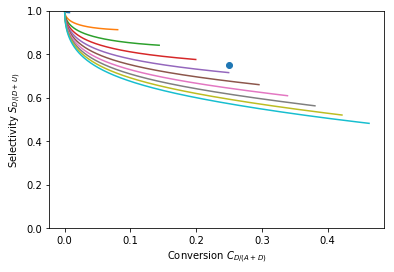

In [7]:
for Fb_inlet in np.linspace(0.1, 10, 10):
    # Change F0 and re-integrate
    F0 = [4., 0, 0, 0, Fb_inlet]
    sol = odeint(dFdV_mem, F0, Vspan)
    # Unpack the solutions
    Fa = sol[:, 0]
    Fd = sol[:, 2]
    Fu = sol[:, 3]
    # Filter out instances of `nan`, which occur when we try to divide
    # by zero
    S = Fd/(Fd+Fu)
    C = Fd/(Fa+Fd)
    plt.plot(C, S, label='Fb inlet = %s' % Fb_inlet)
# Plot Selectivity vs. conversion for various feedrates of B
plt.plot([0.25], [0.75], 'o')
plt.xlabel('Conversion $C_{D/(A+D)}$')
plt.ylabel('Selectivity $S_{D/(D+U)}$ ')
plt.ylim([0, 1])
plt.show()

It looks like the problem may be feasible in the `Fb_inlet` range of about 1 to 5 mol/s, but our reactors do not appear to be long enough. This gives us a good idea of the ranges of `Fb_inlet` and reactor volume/length to iterate over.

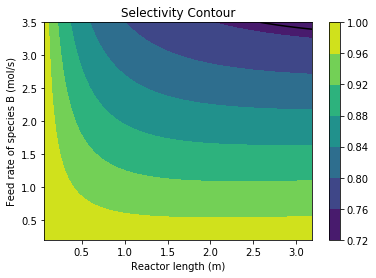

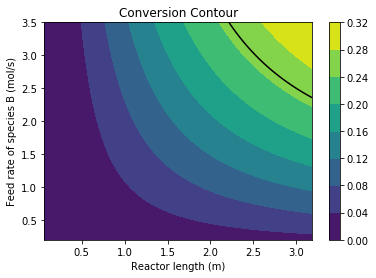

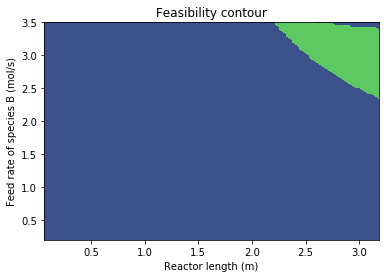

The minimum reactor length is 2.2 meters


In [8]:
import copy

# The values of Fb_inlet and V that we want to look over
Fb_inlet_span = np.linspace(0.2, 3.5, 100)
Vmax_span = np.linspace(2., 100., 100)
Fb_mesh, Vmax_mesh = np.meshgrid(Fb_inlet_span, Vmax_span)
D_mesh = (Vmax_mesh/A)/10

# Initialize arrays of solutions
S = np.empty((len(Fb_inlet_span), len(Vmax_span),))
S[:] = np.NAN
C = copy.deepcopy(S)

# Iterate for each of the inlet flowrates of B and reactor volumes
for i, Vmax in enumerate(Vmax_span):
    V = np.linspace(1., Vmax, 100)
    for j, Fb_inlet in enumerate(Fb_inlet_span):
        F0 = [4., 0., 0., 0., Fb_inlet]
        # Calculate the outlet selectivities and concentrations
        sol = odeint(dFdV_mem, F0, V)
        Fa = sol[-1, 0]
        Fd = sol[-1, 2]
        Fu = sol[-1, 3]
        S[i, j] = Fd/(Fd+Fu)
        C[i, j] = Fd/F0[0]

# Plot selectivity
CS = plt.contour(D_mesh, Fb_mesh, S, levels=[0.75, 1.],
                 colors=('k',), linestyles=('-',))
CSF = plt.contourf(D_mesh, Fb_mesh, S)
plt.colorbar(CSF)
plt.xlabel('Reactor length (m)')
plt.ylabel('Feed rate of species B (mol/s)')
plt.title('Selectivity Contour')
plt.show()
# Plot conversion
CS = plt.contour(D_mesh, Fb_mesh, C, levels=[0.25, 1.],
                 colors=('k',), linestyles=('-',))
CSF = plt.contourf(D_mesh, Fb_mesh, C)
plt.colorbar(CSF)
plt.xlabel('Reactor length (m)')
plt.ylabel('Feed rate of species B (mol/s)')
plt.title('Conversion Contour')
plt.show()
# Plot the area where selectivity and conversion are both achieved
feasibility_mask = np.where(((0.75 < S) & (0.25 < C)), 1, 0)
CS = plt.contourf(D_mesh, Fb_mesh, feasibility_mask, 1)
plt.xlabel('Reactor length (m)')
plt.ylabel('Feed rate of species B (mol/s)')
plt.title('Feasibility contour')
plt.show()

# Do some fancy footwork to find the reactor length.
# You can pick apart each piece to see what's going on.
print('The minimum reactor length is %.1f meters'
      % D_mesh[np.argmax(np.sum(feasibility_mask, axis=1) > 1), 0])